<center>
    <h2 style="font-size: 30px" >Data Preparation</h2> 
</center>

In [43]:
# Transform univariate time series to a supervised learning problem
import numpy as np

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()  # Initialize empty lists

    for i in range(len(sequence)):  # Iterate over sequence
        # Find the end index of this pattern
        end_ix = i + n_steps
        
        # Check if we are beyond the sequence length
        if end_ix >= len(sequence):  # Changed from `> len(sequence)-1` for clarity
            break

        # Gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)  # Convert lists to NumPy arrays


In [45]:
# Example usage
sequence = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps = 3
X, y = split_sequence(sequence, n_steps)

# Print results
print("Input (X):\n", X)
print("Output (y):\n", y)

Input (X):
 [[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]]
Output (y):
 [40 50 60 70 80 90]


<center>
    <h2 style="font-size: 30px" >Vanilla LSTM</h2> 
</center>

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [50]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [52]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [61]:
# demonstrate prediction
from numpy import array
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [63]:
print(yhat)

[[102.45573]]


<center>
    <h2 style="font-size: 30px" >Stacked LSTM</h2> 
</center>

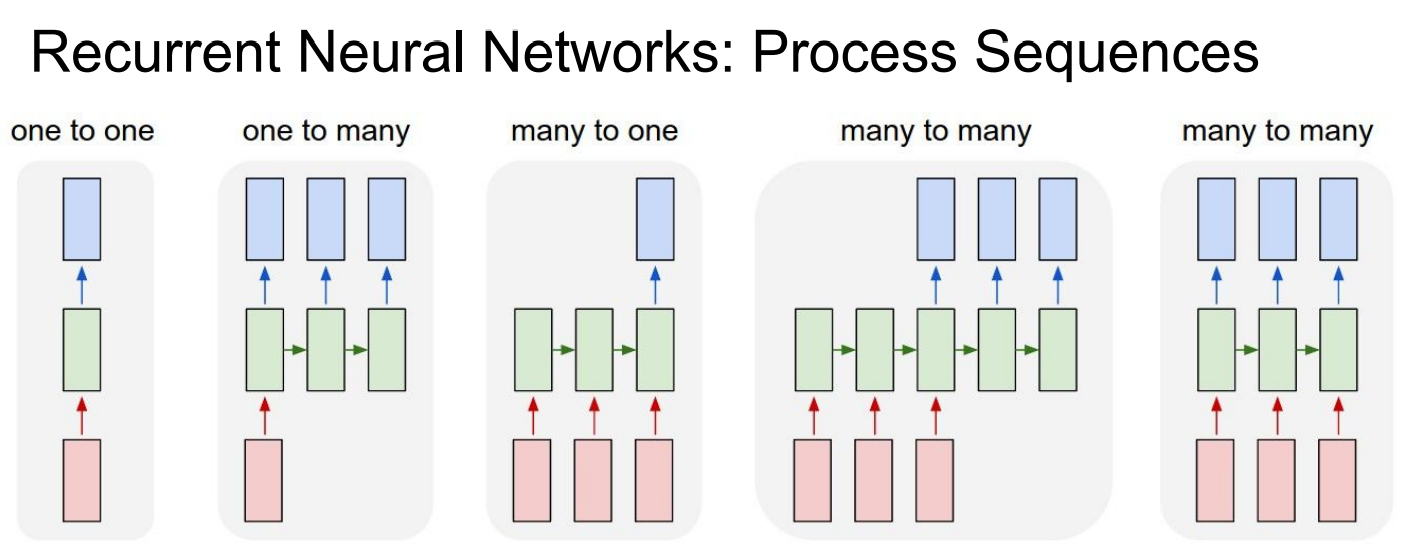

In [75]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,
n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [77]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [72]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.88315]]


<center>
    <h2 style="font-size: 30px" >Bidirectional LSTM</h2> 
</center>

In [83]:
from keras.layers import Bidirectional

In [85]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\nithi\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.810455]]
